In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("tesla.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
 df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [8]:
df.Date= pd.to_datetime(df.Date)

In [9]:
df2 =df.set_index('Date')
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2193 entries, 2010-06-29 to 2019-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2193 non-null   float64
 1   High       2193 non-null   float64
 2   Low        2193 non-null   float64
 3   Close      2193 non-null   float64
 4   Adj Close  2193 non-null   float64
 5   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.9 KB


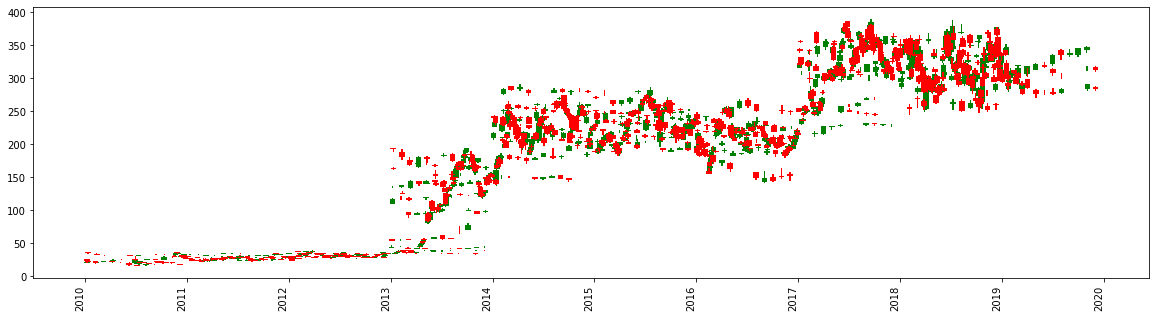

In [14]:
plt.rcParams["figure.figsize"] = (20, 5)   
width = 20
width2 = 5

up = df2[df2.Close>=df2.Open]
down = df2[df2.Close<df2.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=90, ha='right')

#display candlestick chart
plt.show()                                        #for everyday

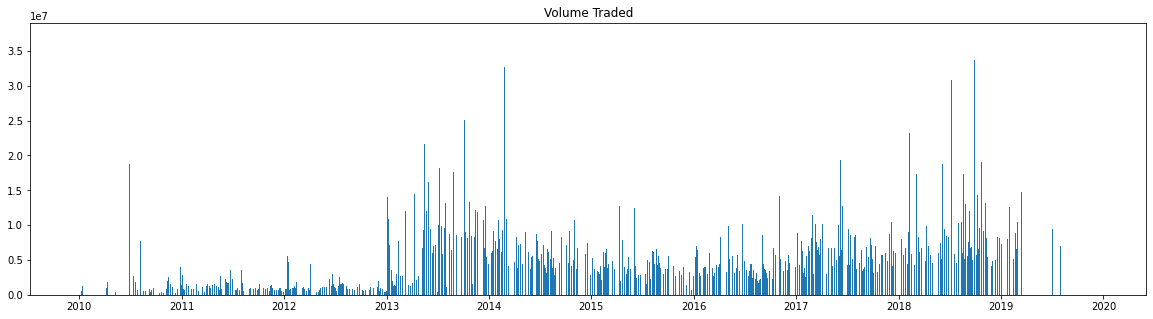

In [15]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.bar(x=df['Date'],height=df['Volume'])
plt.title('Volume Traded')
plt.show()

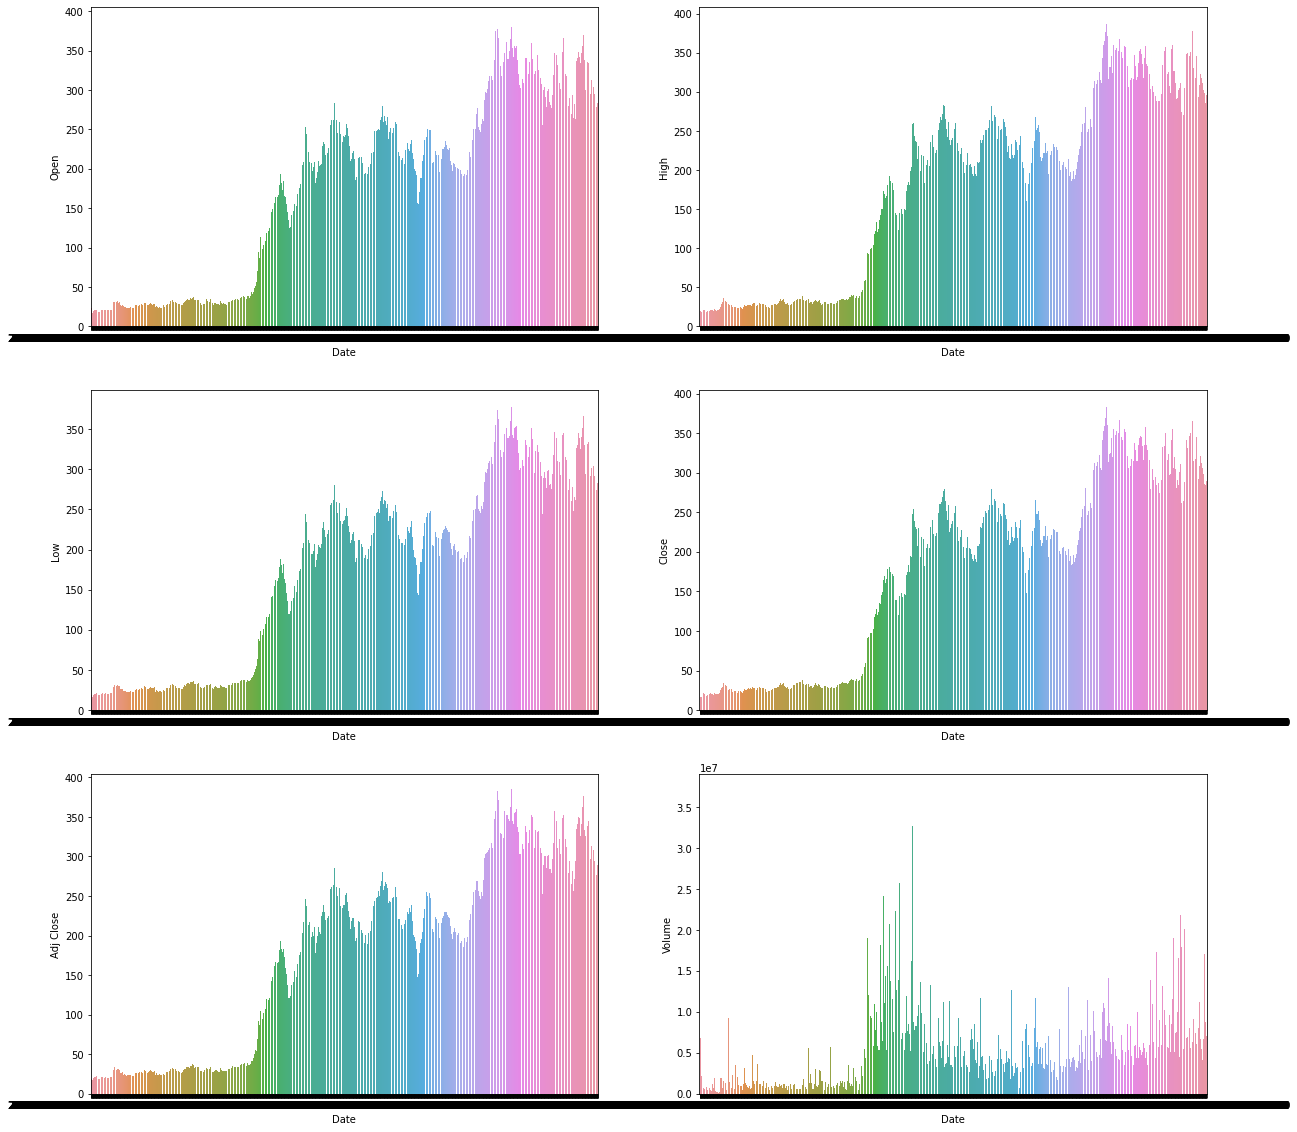

In [16]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.subplot(3, 2, 1)
sns.barplot(x=df['Date'],y=df['Open'])
plt.subplot(3, 2, 2)
sns.barplot(x=df['Date'],y=df['High'])
plt.subplot(3, 2, 3)
sns.barplot(x=df['Date'],y=df['Low'])
plt.subplot(3, 2, 4)
sns.barplot(x=df['Date'],y=df['Close'])
plt.subplot(3, 2, 5)
sns.barplot(x=df['Date'],y=df['Adj Close'])
plt.subplot(3, 2, 6)
sns.barplot(x=df['Date'],y=df['Volume'])

plt.show()